# Homework 3 - Add Noise
## James Hamski
*Problem:
Approximate the function z = 2x^2 - 3y^2 + 1 with added noise. 

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, adam
from sklearn import preprocessing

import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Training Set Generation - No Noise

In [4]:
# create an XY grid from -10 to 10 at 0.1 increments, calculate Z using the polynomial

xy_range = np.arange(-10, 10.1, 0.1)

X = np.repeat(xy_range, len(xy_range))
Y = np.tile(xy_range, len(xy_range))
Z = 2 * (X **2) - 3 * (Y**2) + 1

XY_data = np.vstack((X,Y)).T

## Function Approximation - Mean Absolute Error Loss Function

In [5]:
sgd = SGD(lr=0.5)
model = Sequential()
model.add(Dense(100, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='sgd')

model.fit(XY_data, Z, nb_epoch=80, batch_size=10, verbose=False)

In [6]:
score_mae = model.evaluate(XY_data, Z, batch_size=16, verbose=2)
score_mae

7.8382119013323015

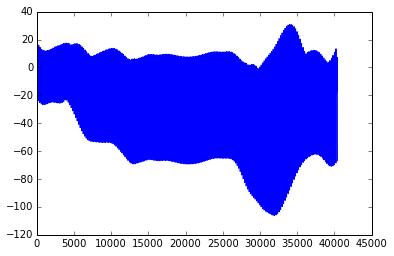

In [7]:
pred_z = model.predict(XY_data, batch_size=100)

pred_z = pred_z.reshape(len(Z),)
error_surface_mae = Z - pred_z 
plt.plot(error_surface_mae)

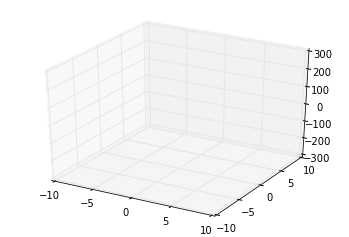

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, pred_z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

## Function Approximation - Mean Square Error Loss Function

In [9]:
model_mse = Sequential()
model_mse.add(Dense(150, input_dim=2))
model_mse.add(Activation('tanh'))
model_mse.add(Dense(80))
model_mse.add(Activation('tanh'))
model_mse.add(Dense(1))
model_mse.compile(loss='mean_squared_error', optimizer='rmsprop')

model_mse.fit(XY_data, Z, nb_epoch=80, batch_size=10, verbose=False)

In [10]:
score_mse = model.evaluate(XY_data, Z, batch_size=16, verbose=2)
score_mse

7.8382119013323015

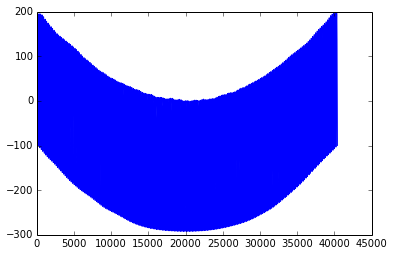

In [11]:
pred_z_mse = model_mse.predict(XY_data, batch_size=100)
plt.plot(pred_z_mse)

In [12]:
pred_z_mse = pred_z_mse.reshape(len(Z),)

In [13]:
error_mse = Z - pred_z_mse

## Training Set Generation - With Noise

In [14]:
x_noise = np.random.laplace(loc=0, scale = 1, size=len(X))
y_noise = np.random.laplace(loc=0, scale = 1, size=len(Y))

X_n = X + x_noise
Y_n = Y + x_noise

Z_n = 2 * (X_n**2) - 3 * (Y_n**2) + 1

XY_data_n = np.vstack((X_n, Y_n)).T

In [15]:
indexes = np.arange(1, len(X) + 1, 1)
X_d = np.vstack((indexes, X)).T
Y_d = np.vstack((indexes, Y)).T
Z_d = np.vstack((indexes, Z)).T

X_d_n = np.vstack((indexes, X_n)).T
Y_d_n = np.vstack((indexes, Y_n)).T
Z_d_n = np.vstack((indexes, Z_n)).T

In [16]:
sgd = SGD(lr=0.5)
model_svd_n = Sequential()
model_svd_n.add(Dense(100, input_dim=2))
model_svd_n.add(Activation('tanh'))
model_svd_n.add(Dense(1))
model_svd_n.compile(loss='mean_absolute_error', optimizer='sgd')

model_svd_n.fit(XY_data_n, Z_n, nb_epoch=80, batch_size=10, verbose=2)

Epoch 1/80
1s - loss: 75.0340
Epoch 2/80
1s - loss: 29.5954
Epoch 3/80
1s - loss: 22.3990
Epoch 4/80
1s - loss: 21.5308
Epoch 5/80
1s - loss: 19.0293
Epoch 6/80
1s - loss: 17.5821
Epoch 7/80
1s - loss: 16.3777
Epoch 8/80
1s - loss: 15.5973
Epoch 9/80
1s - loss: 14.8097
Epoch 10/80
1s - loss: 14.3660
Epoch 11/80
1s - loss: 13.8754
Epoch 12/80
1s - loss: 13.2088
Epoch 13/80
1s - loss: 12.9001
Epoch 14/80
1s - loss: 12.7262
Epoch 15/80
1s - loss: 12.1947
Epoch 16/80
1s - loss: 12.0093
Epoch 17/80
1s - loss: 11.7677
Epoch 18/80
1s - loss: 11.5827
Epoch 19/80
1s - loss: 11.2505
Epoch 20/80
1s - loss: 11.1812
Epoch 21/80
1s - loss: 11.0151
Epoch 22/80
1s - loss: 10.8954
Epoch 23/80
1s - loss: 10.7833
Epoch 24/80
1s - loss: 10.6236
Epoch 25/80
1s - loss: 10.5388
Epoch 26/80
1s - loss: 10.4939
Epoch 27/80
1s - loss: 10.2057
Epoch 28/80
1s - loss: 10.2101
Epoch 29/80
2s - loss: 10.0561
Epoch 30/80
2s - loss: 10.2100
Epoch 31/80
2s - loss: 10.1931
Epoch 32/80
2s - loss: 9.9301
Epoch 33/80
2s - l

In [17]:
score_n = model.evaluate(XY_data_n, Z_n, batch_size=16, verbose=2)
score_n

12.501418015416379

In [18]:
score_mae

7.8382119013323015

The mean absolute error is about twice the value using the exact same model hyperparameters when noise generated with a Laplace distribution is added to the dataset. 